# 데이터 처리

# github.com/slcflab

## Finance-datareader 에서 데이터 받아오기
### https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [ ]:
!pip install -U finance-datareader

In [ ]:
import FinanceDataReader as fdr
print(fdr.__version__)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cvxopt as opt
from cvxopt import solvers
import warnings

0.9.31


In [ ]:
# 한국 종목
# KRX, KOSPI, KOSDAQ, KONEX, KONEX

# 미국 종목
# NASDAQ, NYSE, AMEX, SP500

# 각종 지수 및 환율
#각종 지수: KS11(코스피지수), KQ11(코스닥지수), DJI(다우지수), IXIC(나스닥 지수), US500(S&P 500)
#환율 데이터: USD/KRX (원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRW: 위엔화 원화 환율


# 암호 화폐
#암호화폐 가격: BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원화 가격, 빗썸)


fdr.StockListing('SP500')

,Symbol,Name,Sector,Industry
0,MMM,3M Company,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals
3,ABMD,Abiomed,Health Care,Health Care Equipment
4,ACN,Accenture,Information Technology,IT Consulting & Other Services
...,...,...,...,...
500,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants
501,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
502,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
503,ZION,Zions Bancorp,Financials,Regional Banks


In [ ]:
fdr.StockListing('KOSPI')

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"이현우, 박대현",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6985,215620,KOSPI,흥국 S&P코리아로우볼,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6987,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
6988,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6989,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
fdr.DataReader('006840', '2019-01-01', '2019-12-31')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,53900,54000,51300,51900,23981,-0.038889
2019-01-03,51900,52100,49950,50000,16716,-0.036609
2019-01-04,48950,49950,48900,49300,19437,-0.014000
2019-01-07,50700,50700,49350,50600,12873,0.026369
2019-01-08,51000,51000,49850,50200,11508,-0.007905
...,...,...,...,...,...,...
2019-12-23,33200,33600,32650,33500,17555,0.007519
2019-12-24,33700,34700,33350,34500,29027,0.029851
2019-12-26,34200,35400,34150,34900,38907,0.011594


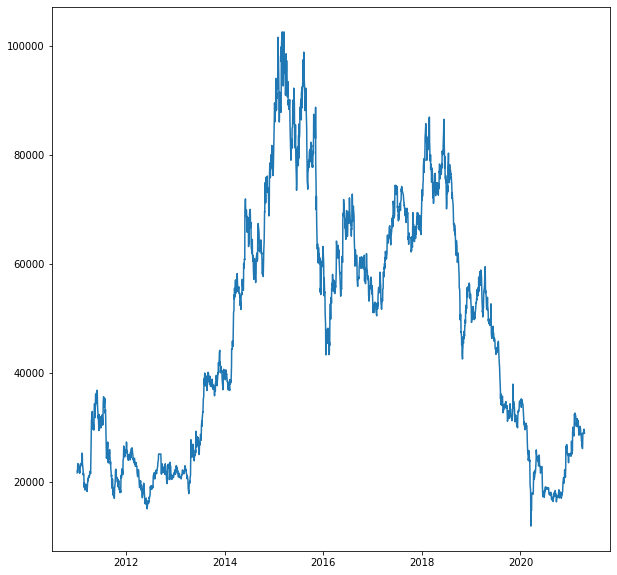

In [ ]:
plt.figure(figsize=(10, 10))

dt = fdr.DataReader('006840', '2011') #2011년~현재
plt.plot(dt['Close'])

In [ ]:
# KS11	KOSPI 지수
# KQ11	KOSDAQ 지수
# KS50	KOSPI 50 지수
# KS100	KOSPI 100
# KRX100	KRX 100
# KS200	코스피 200

# DJI	다우존스 지수
# IXIC	나스닥 지수
# US500	S&P 500 지수
# VIX	S&P 500 VIX

# JP225	닛케이 225 선물
# STOXX50E	Euro Stoxx 50
# CSI300	CSI 300 (중국)
# HSI	항셍 (홍콩)
# FTSE	영국 FTSE
# DAX	독일 DAX 30
# CAC	프랑스 CAC 40


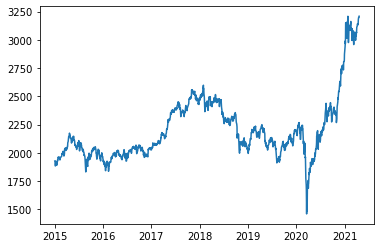

In [ ]:
# KS11 (KOSPI 지수), 2015년~현재
df = fdr.DataReader('KS11', '2015')
plt.plot(df['Close'])

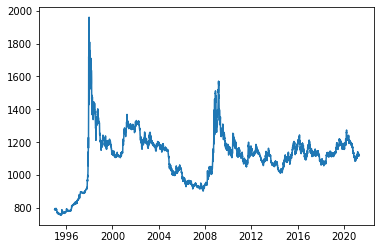

In [ ]:
# 원달러 환율, 1995년~현재
df = fdr.DataReader('USD/KRW', '1995')
plt.plot(df['Close'])

## 데이터 전처리 하기

In [ ]:
dt = fdr.StockListing('SP500')

In [ ]:
a = {}

for name in dt['Symbol'][:20]:
    print(name)
    try:
        a[name] = fdr.DataReader(name, '2018-12-31', '2019-12-31')['Close']
    except:
        print('except')
        pass

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE


In [ ]:
a['MMM']

Date
2018-12-31    190.54
2019-01-02    190.95
2019-01-03    183.76
2019-01-04    191.32
2019-01-07    190.88
               ...  
2019-12-24    176.68
2019-12-26    176.59
2019-12-27    177.26
2019-12-30    175.83
2019-12-31    176.42
Name: Close, Length: 253, dtype: float64

In [ ]:
k = pd.DataFrame(a)

In [ ]:
k.shape

(253, 20)

In [ ]:
k

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE
Date,,,,,,,,,,,,,,,,,,,,
2018-12-31,190.54,72.33,92.19,325.04,141.01,46.57,226.24,18.46,157.46,14.46,45.56,67.46,160.05,61.08,60.85,77.07,115.24,97.36,209.43,79.71
2019-01-02,190.95,69.50,89.23,309.96,140.59,47.03,224.57,18.83,157.92,14.18,45.52,65.69,159.59,59.01,61.52,78.11,111.37,98.05,202.12,81.05
2019-01-03,183.76,66.22,86.29,302.29,135.79,45.36,215.70,17.05,162.85,14.17,44.37,63.27,155.31,57.70,58.12,72.69,112.29,100.21,184.78,79.68
2019-01-04,191.32,68.11,89.07,313.44,141.07,47.17,226.19,19.00,158.81,14.64,44.92,65.46,161.61,59.38,60.00,76.24,113.44,106.00,186.71,79.50
2019-01-07,190.88,69.13,90.37,314.80,141.56,48.50,229.26,20.57,161.14,14.71,45.16,66.85,159.93,61.24,60.12,76.58,114.14,107.94,189.92,80.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,176.68,87.28,89.85,172.30,211.61,58.81,329.64,46.54,160.57,19.76,52.76,85.30,235.05,85.73,69.09,72.32,160.10,110.28,277.89,123.87
2019-12-26,176.59,87.28,89.83,171.01,212.05,58.89,331.20,46.63,159.27,19.93,52.62,85.45,236.08,86.34,69.07,72.49,160.03,108.93,278.26,124.64
2019-12-27,177.26,87.40,89.20,169.27,212.22,59.19,330.79,46.18,158.35,19.98,52.62,85.42,235.49,86.50,68.29,72.01,160.40,108.55,277.64,124.59


<Figure size 3600x3600 with 0 Axes>

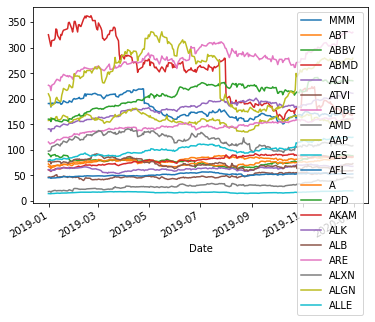

In [ ]:
plt.figure(figsize=(50, 50))
k.plot()

In [ ]:
kk = k / k.iloc[0]

In [ ]:
kk

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE
Date,,,,,,,,,,,,,,,,,,,,
2018-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-02,1.002152,0.960874,0.967892,0.953606,0.997021,1.009878,0.992618,1.020043,1.002921,0.980636,0.999122,0.973762,0.997126,0.966110,1.011011,1.013494,0.966418,1.007087,0.965096,1.016811
2019-01-03,0.964417,0.915526,0.936002,0.930009,0.962981,0.974018,0.953412,0.923619,1.034231,0.979945,0.973881,0.937889,0.970384,0.944663,0.955136,0.943169,0.974401,1.029273,0.882300,0.999624
2019-01-04,1.004094,0.941656,0.966157,0.964312,1.000426,1.012884,0.999779,1.029252,1.008574,1.012448,0.985953,0.970353,1.009747,0.972168,0.986031,0.989231,0.984380,1.088743,0.891515,0.997365
2019-01-07,1.001784,0.955758,0.980258,0.968496,1.003900,1.041443,1.013349,1.114301,1.023371,1.017289,0.991220,0.990958,0.999250,1.002620,0.988003,0.993642,0.990455,1.108669,0.906842,1.007778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.927259,1.206692,0.974618,0.530089,1.500674,1.262830,1.457037,2.521127,1.019751,1.366528,1.158033,1.264453,1.468604,1.403569,1.135415,0.938368,1.389275,1.132703,1.326887,1.554008
2019-12-26,0.926787,1.206692,0.974401,0.526120,1.503794,1.264548,1.463932,2.526002,1.011495,1.378285,1.154960,1.266677,1.475039,1.413556,1.135086,0.940574,1.388667,1.118837,1.328654,1.563668
2019-12-27,0.930303,1.208351,0.967567,0.520767,1.505000,1.270990,1.462120,2.501625,1.005652,1.381743,1.154960,1.266232,1.471353,1.416176,1.122268,0.934345,1.391878,1.114934,1.325694,1.563041


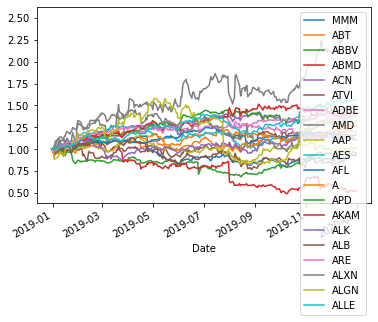

In [ ]:
kk.plot()

## Expected Return and Covariance 구하기

In [ ]:
data = k
holding_periods=1


In [ ]:
returns = data.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector

In [ ]:
returns

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.002152,-0.039126,-0.032108,-0.046394,-0.002979,0.009878,-0.007382,0.020043,0.002921,-0.019364,-0.000878,-0.026238,-0.002874,-0.033890,0.011011,0.013494,-0.033582,0.007087,-0.034904,0.016811
2019-01-03,-0.037654,-0.047194,-0.032949,-0.024745,-0.034142,-0.035509,-0.039498,-0.094530,0.031218,-0.000705,-0.025264,-0.036840,-0.026819,-0.022200,-0.055267,-0.069389,0.008261,0.022030,-0.085791,-0.016903
2019-01-04,0.041141,0.028541,0.032217,0.036885,0.038884,0.039903,0.048632,0.114370,-0.024808,0.033169,0.012396,0.034614,0.040564,0.029116,0.032347,0.048838,0.010241,0.057779,0.010445,-0.002259
2019-01-07,-0.002300,0.014976,0.014595,0.004339,0.003473,0.028196,0.013573,0.082632,0.014672,0.004781,0.005343,0.021234,-0.010395,0.031324,0.002000,0.004460,0.006171,0.018302,0.017192,0.010440
2019-01-08,0.004191,-0.012006,0.004648,0.011499,0.025290,0.030309,0.014918,0.008751,-0.006950,0.023114,0.003100,0.014660,-0.011505,0.019758,0.008816,0.009794,0.023217,0.006207,0.015954,0.013818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.010030,-0.000801,-0.004432,0.010913,0.003700,-0.001358,0.002098,0.023757,0.003751,-0.003027,0.004187,0.000469,-0.000383,-0.002095,-0.002886,-0.001519,0.005590,-0.001630,-0.000899,0.003646
2019-12-26,-0.000509,0.000000,-0.000223,-0.007487,0.002079,0.001360,0.004732,0.001934,-0.008096,0.008603,-0.002654,0.001758,0.004382,0.007115,-0.000289,0.002351,-0.000437,-0.012242,0.001331,0.006216
2019-12-27,0.003794,0.001375,-0.007013,-0.010175,0.000802,0.005094,-0.001238,-0.009650,-0.005776,0.002509,0.000000,-0.000351,-0.002499,0.001853,-0.011293,-0.006622,0.002312,-0.003488,-0.002228,-0.000401


In [ ]:
data

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE
Date,,,,,,,,,,,,,,,,,,,,
2018-12-31,190.54,72.33,92.19,325.04,141.01,46.57,226.24,18.46,157.46,14.46,45.56,67.46,160.05,61.08,60.85,77.07,115.24,97.36,209.43,79.71
2019-01-02,190.95,69.50,89.23,309.96,140.59,47.03,224.57,18.83,157.92,14.18,45.52,65.69,159.59,59.01,61.52,78.11,111.37,98.05,202.12,81.05
2019-01-03,183.76,66.22,86.29,302.29,135.79,45.36,215.70,17.05,162.85,14.17,44.37,63.27,155.31,57.70,58.12,72.69,112.29,100.21,184.78,79.68
2019-01-04,191.32,68.11,89.07,313.44,141.07,47.17,226.19,19.00,158.81,14.64,44.92,65.46,161.61,59.38,60.00,76.24,113.44,106.00,186.71,79.50
2019-01-07,190.88,69.13,90.37,314.80,141.56,48.50,229.26,20.57,161.14,14.71,45.16,66.85,159.93,61.24,60.12,76.58,114.14,107.94,189.92,80.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,176.68,87.28,89.85,172.30,211.61,58.81,329.64,46.54,160.57,19.76,52.76,85.30,235.05,85.73,69.09,72.32,160.10,110.28,277.89,123.87
2019-12-26,176.59,87.28,89.83,171.01,212.05,58.89,331.20,46.63,159.27,19.93,52.62,85.45,236.08,86.34,69.07,72.49,160.03,108.93,278.26,124.64
2019-12-27,177.26,87.40,89.20,169.27,212.22,59.19,330.79,46.18,158.35,19.98,52.62,85.42,235.49,86.50,68.29,72.01,160.40,108.55,277.64,124.59


In [ ]:
data.shift(holding_periods)

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE
Date,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,190.54,72.33,92.19,325.04,141.01,46.57,226.24,18.46,157.46,14.46,45.56,67.46,160.05,61.08,60.85,77.07,115.24,97.36,209.43,79.71
2019-01-03,190.95,69.50,89.23,309.96,140.59,47.03,224.57,18.83,157.92,14.18,45.52,65.69,159.59,59.01,61.52,78.11,111.37,98.05,202.12,81.05
2019-01-04,183.76,66.22,86.29,302.29,135.79,45.36,215.70,17.05,162.85,14.17,44.37,63.27,155.31,57.70,58.12,72.69,112.29,100.21,184.78,79.68
2019-01-07,191.32,68.11,89.07,313.44,141.07,47.17,226.19,19.00,158.81,14.64,44.92,65.46,161.61,59.38,60.00,76.24,113.44,106.00,186.71,79.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,178.47,87.35,90.25,170.44,210.83,58.89,328.95,45.46,159.97,19.82,52.54,85.26,235.14,85.91,69.29,72.43,159.21,110.46,278.14,123.42
2019-12-26,176.68,87.28,89.85,172.30,211.61,58.81,329.64,46.54,160.57,19.76,52.76,85.30,235.05,85.73,69.09,72.32,160.10,110.28,277.89,123.87
2019-12-27,176.59,87.28,89.83,171.01,212.05,58.89,331.20,46.63,159.27,19.93,52.62,85.45,236.08,86.34,69.07,72.49,160.03,108.93,278.26,124.64


In [ ]:
returns2 = (data - data.shift(holding_periods)) / data.shift(holding_periods)

In [ ]:
log_returns = np.log(data) - np.log(data.shift(holding_periods))

In [ ]:
log_returns

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE
Date,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.002149,-0.039912,-0.032634,-0.047505,-0.002983,0.009829,-0.007409,0.019845,0.002917,-0.019554,-0.000878,-0.026588,-0.002878,-0.034478,0.010951,0.013404,-0.034159,0.007062,-0.035528,0.016671
2019-01-03,-0.038381,-0.048344,-0.033504,-0.025056,-0.034738,-0.036155,-0.040299,-0.099301,0.030741,-0.000705,-0.025588,-0.037535,-0.027185,-0.022450,-0.056852,-0.071914,0.008227,0.021790,-0.089696,-0.017048
2019-01-04,0.040317,0.028142,0.031709,0.036221,0.038147,0.039127,0.047487,0.108289,-0.025121,0.032630,0.012320,0.034028,0.039763,0.028700,0.031835,0.047682,0.010189,0.056171,0.010391,-0.002262
2019-01-07,-0.002302,0.014865,0.014490,0.004330,0.003467,0.027806,0.013481,0.079395,0.014565,0.004770,0.005329,0.021012,-0.010450,0.030843,0.001998,0.004450,0.006152,0.018136,0.017046,0.010386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.010080,-0.000802,-0.004442,0.010854,0.003693,-0.001359,0.002095,0.023479,0.003744,-0.003032,0.004179,0.000469,-0.000383,-0.002097,-0.002891,-0.001520,0.005575,-0.001631,-0.000899,0.003639
2019-12-26,-0.000510,0.000000,-0.000223,-0.007515,0.002077,0.001359,0.004721,0.001932,-0.008129,0.008566,-0.002657,0.001757,0.004372,0.007090,-0.000290,0.002348,-0.000437,-0.012317,0.001331,0.006197
2019-12-27,0.003787,0.001374,-0.007038,-0.010227,0.000801,0.005081,-0.001239,-0.009697,-0.005793,0.002506,0.000000,-0.000351,-0.002502,0.001851,-0.011357,-0.006644,0.002309,-0.003495,-0.002231,-0.000401


In [ ]:
holding_periods=1
n_term=252 # dailiy return을 annualize
data = k

returns = data.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector

exp_rets = returns.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat = returns.cov() * n_term # covariance
corr_mat = returns.corr() # corr

In [ ]:
corr_mat

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE
MMM,1.000000,0.291815,0.235660,0.191765,0.397799,0.232976,0.287453,0.372022,0.207645,0.282074,0.288850,0.360360,0.338800,0.322732,0.403123,0.439768,0.121983,0.291150,0.222291,0.225187
ABT,0.291815,1.000000,0.368518,0.391428,0.566269,0.293003,0.521462,0.403578,0.155020,0.307210,0.460534,0.571211,0.480947,0.486013,0.229046,0.244832,0.360960,0.389067,0.400556,0.322701
ABBV,0.235660,0.368518,1.000000,0.165973,0.290872,0.206074,0.333090,0.274116,0.129316,0.277472,0.220186,0.321858,0.198545,0.275872,0.199681,0.206293,0.266193,0.326447,0.222102,0.197262
ABMD,0.191765,0.391428,0.165973,1.000000,0.179323,0.107772,0.198830,0.208952,0.073226,0.012535,0.141986,0.240540,0.123305,0.098355,0.089244,0.177768,0.133291,0.226346,0.271278,0.199636
ACN,0.397799,0.566269,0.290872,0.179323,1.000000,0.425764,0.605730,0.426406,0.157662,0.384057,0.476308,0.510825,0.519182,0.593287,0.292241,0.341877,0.356910,0.306912,0.268754,0.379652
ATVI,0.232976,0.293003,0.206074,0.107772,0.425764,1.000000,0.399546,0.366843,0.246275,0.131779,0.255808,0.291625,0.170420,0.438253,0.257181,0.266565,0.226073,0.224353,0.214796,0.250845
ADBE,0.287453,0.521462,0.333090,0.198830,0.605730,0.399546,1.000000,0.451221,0.149398,0.241819,0.350705,0.425677,0.403058,0.556657,0.258301,0.294114,0.357298,0.367905,0.365120,0.369018
AMD,0.372022,0.403578,0.274116,0.208952,0.426406,0.366843,0.451221,1.000000,0.124201,0.223077,0.287238,0.395794,0.352017,0.364250,0.290231,0.457733,0.212323,0.301821,0.340845,0.260786
AAP,0.207645,0.155020,0.129316,0.073226,0.157662,0.246275,0.149398,0.124201,1.000000,0.183678,0.252271,0.214597,0.059738,0.247027,0.233737,0.201967,0.155658,0.175492,0.293357,0.287502
AES,0.282074,0.307210,0.277472,0.012535,0.384057,0.131779,0.241819,0.223077,0.183678,1.000000,0.248748,0.326316,0.222982,0.285095,0.164794,0.217406,0.367462,0.243625,0.170706,0.163614


In [ ]:
cov_mat = returns.cov()

In [ ]:
var = np.diag(cov_mat)

In [ ]:
annulized_var = var * n_term

In [ ]:
daily_std = returns.std()

In [ ]:
annulized_std = daily_std * np.sqrt(252)

In [ ]:
returns.cov()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE
MMM,0.000252,0.000058,0.000065,0.000097,0.000067,0.000083,0.000068,0.000200,0.000055,0.000056,0.000043,0.000088,0.000065,0.000071,0.000094,0.000159,0.000019,0.000108,0.000103,0.000044
ABT,0.000058,0.000158,0.000080,0.000156,0.000076,0.000082,0.000098,0.000172,0.000033,0.000049,0.000055,0.000111,0.000073,0.000084,0.000042,0.000070,0.000045,0.000114,0.000147,0.000050
ABBV,0.000065,0.000080,0.000299,0.000091,0.000053,0.000080,0.000086,0.000161,0.000037,0.000060,0.000036,0.000086,0.000041,0.000066,0.000051,0.000081,0.000046,0.000131,0.000112,0.000042
ABMD,0.000097,0.000156,0.000091,0.001010,0.000061,0.000076,0.000095,0.000225,0.000039,0.000005,0.000043,0.000118,0.000047,0.000043,0.000042,0.000129,0.000042,0.000167,0.000252,0.000079
ACN,0.000067,0.000076,0.000053,0.000061,0.000113,0.000101,0.000097,0.000154,0.000028,0.000051,0.000048,0.000084,0.000066,0.000087,0.000046,0.000083,0.000038,0.000076,0.000083,0.000050
ATVI,0.000083,0.000082,0.000080,0.000076,0.000101,0.000499,0.000134,0.000278,0.000092,0.000037,0.000054,0.000100,0.000046,0.000135,0.000085,0.000136,0.000050,0.000117,0.000140,0.000070
ADBE,0.000068,0.000098,0.000086,0.000095,0.000097,0.000134,0.000225,0.000230,0.000037,0.000046,0.000050,0.000098,0.000073,0.000116,0.000057,0.000101,0.000054,0.000128,0.000160,0.000069
AMD,0.000200,0.000172,0.000161,0.000225,0.000154,0.000278,0.000230,0.001150,0.000070,0.000095,0.000092,0.000207,0.000143,0.000171,0.000145,0.000354,0.000072,0.000238,0.000337,0.000110
AAP,0.000055,0.000033,0.000037,0.000039,0.000028,0.000092,0.000037,0.000070,0.000279,0.000039,0.000040,0.000055,0.000012,0.000057,0.000058,0.000077,0.000026,0.000068,0.000143,0.000060
AES,0.000056,0.000049,0.000060,0.000005,0.000051,0.000037,0.000046,0.000095,0.000039,0.000159,0.000030,0.000063,0.000034,0.000050,0.000031,0.000063,0.000046,0.000071,0.000063,0.000026


In [ ]:
def func1(a):
    ret = a + 1
    return ret

## 실습 1)

### 다음의 조건에 해당하는 각 지수별 price data를 pandas의 DataFrame 형태로 생성하시오.
### https://financedata.github.io/posts/finance-data-reader-users-guide.html
### 조건 1: 각 row의 인덱스는 날짜, 각 컬럼은 KOSPI200 지수, S&P500 지수, 나스닥 지수, 닛케이225 선물, USD/KRW로 구성.
### 조건 2: 종가 기준, 기간은 2010년 이후 현재까지.

### KS200	코스피 200, US500	S&P 500 지수, JP225	닛케이 225 선물


## 실습 2)

### 위에서 생성된 DataFrame을 활용하여 다음의 데이터를 만드시오.
### a) daily return vector.
### b) (annulaize된) expected return
### c) covariance matrix
### d) correlation matrix

In [ ]:
"""
(참고)return 구하는 코드
returns = data.pct_change(holding_periods).iloc[holding_periods:]

(주의) annualize 할때
returns.mean() 에 무엇을 곱해야?
returns.cov() 에 무엇을 곱해야?
"""


'\n(참고)return 구하는 코드\nreturns = data.pct_change(holding_periods).iloc[holding_periods:]\n\n(주의) annualize 할때\nreturns.mean() 에 무엇을 곱해야?\nreturns.cov() 에 무엇을 곱해야?\n'

## 답 1)

In [ ]:
symbols = ['KS200', 'US500', 'IXIC', 'JP225', 'USD/KRW']

a = {}
for symbol in symbols:
  a[symbol] = fdr.DataReader(symbol, '2009-12-31')['Close']

In [ ]:
a = pd.DataFrame(a)

,KS200,US500,IXIC,JP225,USD/KRW
Date,,,,,
2009-12-31,NaN,1115.10,2269.15,NaN,1166.08
2010-01-01,NaN,NaN,NaN,NaN,1166.08
2010-01-04,223.49,1132.99,2308.42,NaN,1150.00
2010-01-05,222.84,1136.52,2308.71,NaN,1140.20
2010-01-06,224.67,1137.14,2301.09,NaN,1129.20
...,...,...,...,...,...
2021-04-15,432.66,4170.42,14038.76,29642.69,1116.68
2021-04-16,432.43,4185.47,14052.34,29683.37,1116.50
2021-04-18,NaN,NaN,NaN,NaN,1116.65


## 답 2)

In [ ]:
holding_periods=1
n_term=252 # dailiy return을 annualize
data = a

returns = data.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
exp_rets = returns.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat = returns.cov() * n_term # covariance
corr_mat = returns.corr() # corr

In [ ]:
E[aX] = aE[X]

In [ ]:
E[r_anualized] = E[r1+r2+....] = E[252*r] = 252 * E[r]

In [ ]:
Var(X_1 + X_2) = Var(X_1) + Var(X_2)

In [ ]:
Var(r_1 + ...) = Var(r) + var(r) + ... = 252 * Var(r)

In [ ]:
std(X) = sqrt(Var(X))

In [ ]:
corr_mat

,KS200,US500,IXIC,JP225,USD/KRW
KS200,1.000000,0.228965,0.207711,0.522027,-0.364097
US500,0.228965,1.000000,0.951467,0.181238,-0.348239
IXIC,0.207711,0.951467,1.000000,0.161553,-0.335530
JP225,0.522027,0.181238,0.161553,1.000000,-0.140408
USD/KRW,-0.364097,-0.348239,-0.335530,-0.140408,1.000000


# Efficient frontier 구하기

### https://cvxopt.org/userguide/coneprog.html?highlight=qp#cvxoptsolvers.qp

In [ ]:
def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
        n = len(cov_mat)
        
        # Objective function
        # min (1/2)*w.T*P*w
        P = opt.matrix(cov_mat.values) 
        q = opt.matrix(0.0, (n, 1))
        
        # Constraints Gw <= h
        # exp_rets*w >= target_ret and w >= 0
        G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
        h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))
        
        # Constraints Aw = b
        # sum(w) = 1
        A = opt.matrix(1.0, (1, n))
        b = opt.matrix(1.0)
        
        # Solve
        solvers.options['show_progress'] = False
        sol = solvers.qp(P, q, G, h, A, b)
        
        # Put weights into a labeled series
        w = pd.Series(sol['x'], index=cov_mat.index)
        
        return w

In [ ]:
np.array(exp_rets)

array([ 0.07109398,  0.12731796,  0.17354707,  0.12901503, -0.0002856 ])

In [ ]:
np.sqrt(np.diag(cov_mat))

array([0.1698544 , 0.17121023, 0.19207342, 0.20235543, 0.08534446])

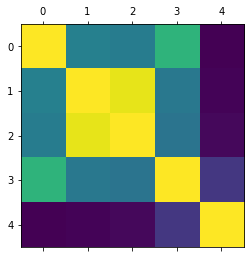

In [ ]:
plt.matshow(corr_mat)
plt.show()

In [ ]:
corr_mat.style.background_gradient(cmap='coolwarm')

,KS200,US500,IXIC,JP225,USD/KRW
KS200,1.000000,0.228965,0.207711,0.522027,-0.364097
US500,0.228965,1.000000,0.951467,0.181238,-0.348239
IXIC,0.207711,0.951467,1.000000,0.161553,-0.335530
JP225,0.522027,0.181238,0.161553,1.000000,-0.140408
USD/KRW,-0.364097,-0.348239,-0.335530,-0.140408,1.000000


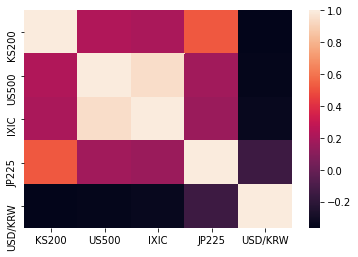

In [ ]:
import seaborn as sns
sns.heatmap(corr_mat)

In [ ]:
exp_rets

KS200      0.071094
US500      0.127318
IXIC       0.173547
JP225      0.129015
USD/KRW   -0.000286
dtype: float64

In [ ]:
np.sqrt(np.diag(cov_mat)).max()

0.20235543179792304

In [ ]:
exp_rets.max()

0.1735470663636901

In [ ]:
exp_rets[exp_rets > 0].min()

0.07109398197089545

In [ ]:
exp_rets[exp_rets > 0].min()

In [ ]:
max_risk = 0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))
    
    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)

In [ ]:
min_ret

0.07109398197089545

In [ ]:
risks

[0.06699770636002746,
 0.0677064214571896,
 0.06842972104354908,
 0.06916714855693357,
 0.06991825720870892,
 0.07068262173977131,
 0.07145980742570072,
 0.07224939820395974,
 0.07305099212547421,
 0.07386419815243056,
 0.07468863697632164,
 0.07552394071476681,
 0.07636975282507455,
 0.07722572798050824,
 0.07809153191633803,
 0.07896684124711137,
 0.07985134326263209,
 0.08074473585912366,
 0.08164672786236145,
 0.08255703609376108,
 0.08347538862294261,
 0.08440152196180764,
 0.08533518307245783,
 0.08627613396839524,
 0.08722413861865869,
 0.08817896558997633,
 0.08914039523243467,
 0.09010822350039001,
 0.09108222510990382,
 0.0920622246737804,
 0.0930480270020574,
 0.09403944924041988,
 0.09503631502715784,
 0.09603845476064926,
 0.09704570512486695,
 0.09805790910825973,
 0.09907491484583894,
 0.10009657828191576,
 0.10112276322482806,
 0.10215329202833265,
 0.10318809012383195,
 0.1042270085341825,
 0.10526992577608218,
 0.10631672992294991,
 0.10736733309529221,
 0.10842174747

In [ ]:
rets

[0.07109399511186733,
 0.07211852438129725,
 0.07314305328309982,
 0.0741675821085272,
 0.07519211095116748,
 0.07621664185786592,
 0.07724117307418799,
 0.07826570418289318,
 0.07929023525418263,
 0.08031476624146235,
 0.08133929715093191,
 0.08236382798722416,
 0.08338835875276396,
 0.08441288944703171,
 0.08543742006604248,
 0.0864619506016768,
 0.08748648104138514,
 0.08851101141762834,
 0.08953554168656848,
 0.09056007178980836,
 0.09158460179402746,
 0.09260913166802695,
 0.09363366149329894,
 0.09465819186491076,
 0.09568272268961016,
 0.09670725350591565,
 0.09773178431814403,
 0.09875631579748761,
 0.0997808458919145,
 0.10080537670733482,
 0.10182990771919567,
 0.10285443890664853,
 0.1038789701268746,
 0.10490350133167681,
 0.10592803253764799,
 0.10695256388779786,
 0.10797709540607693,
 0.10900162795132107,
 0.11002616293418553,
 0.11105068503663794,
 0.11207521596901594,
 0.11309974692518605,
 0.11412427807479203,
 0.1151488108229753,
 0.11617334548726327,
 0.117197879387

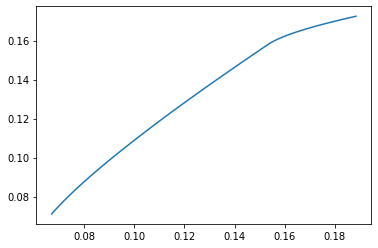

In [ ]:
plt.plot(risks, rets)



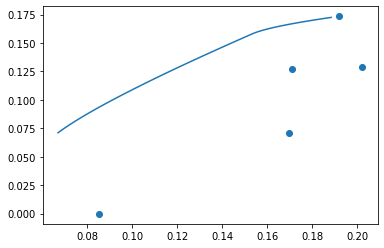

In [ ]:
plt.plot(risks, rets)
var = np.diag(cov_mat)
plt.scatter(np.sqrt(var), exp_rets)

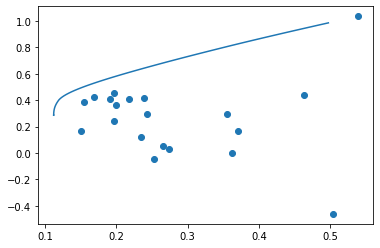

In [ ]:
plt.plot(risks, rets)
var = np.diag(cov_mat)
plt.scatter(np.sqrt(var), exp_rets)

In [ ]:
# 아래의 최적화 코드 활용하기

def mean_var_portfolio(cov_mat, exp_rets, target_ret):
        n = len(cov_mat)

        P = opt.matrix(cov_mat.values) 
        q = opt.matrix(0.0, (n, 1))
        
        
        G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
        h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))
        
        A = opt.matrix(1.0, (1, n))
        b = opt.matrix(1.0)
        
        solvers.options['show_progress'] = False
        sol = solvers.qp(P, q, G, h, A, b)
        
        w = pd.Series(sol['x'], index=cov_mat.index)
        
        return w

## 실습 3)

### 위 실습 1,2에서 구한 expected return과 covriance를 바탕으로 아래의 코드의 빈칸을 채워 Efficient frontier를 그려보시오

In [ ]:
max_risk=0.5
max_ret = ??
min_ret = ??

n_step = 1000
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = ?? # 최적화를 돌려서 나온 _w임.
    risk = ??

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = ??
    rets.append(ret)

## 답 3)

In [ ]:
max_risk=0.5
max_ret = exp_rets.max()
min_ret = exp_rets[exp_rets > 0].min()

n_step = 1000
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))

    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)

In [ ]:
plt.plot(risks, rets)